In [0]:
import keras
import tensorflow as tf
from keras.datasets import cifar10
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
class_names = ['airplan', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = 0
image = train_images[index]

train_images = train_images / 255.0
test_images = test_images / 255.0

# Good Fit Model

### Build the Model

In [0]:
# set up the layers

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Conv2D(32,(3, 3)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(64, (3, 3), padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Conv2D(64, (3,3)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10))
model.add(keras.layers.Activation('softmax'))

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20

history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 282s 6ms/step - loss: 1.5308 - acc: 0.4420 - val_loss: 1.1567 - val_acc: 0.5827
Epoch 2/20
50000/50000 [==============================] - 281s 6ms/step - loss: 1.1467 - acc: 0.5920 - val_loss: 0.9618 - val_acc: 0.6639
Epoch 3/20
50000/50000 [==============================] - 282s 6ms/step - loss: 0.9987 - acc: 0.6463 - val_loss: 0.8793 - val_acc: 0.7007
Epoch 4/20
50000/50000 [==============================] - 282s 6ms/step - loss: 0.9032 - acc: 0.6798 - val_loss: 0.8280 - val_acc: 0.7115
Epoch 5/20
50000/50000 [==============================] - 282s 6ms/step - loss: 0.8375 - acc: 0.7078 - val_loss: 0.7894 - val_acc: 0.7235
Epoch 6/20
50000/50000 [==============================] - 282s 6ms/step - loss: 0.7894 - acc: 0.7241 - val_loss: 0.7336 - val_acc: 0.7479
Epoch 7/20
50000/50000 [==============================] - 282s 6ms/step - loss: 0.7570 - acc: 0.7353 - val_loss: 0.7247 - 

### Loss and Accuracy Graph

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

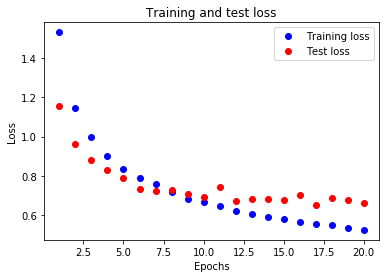

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

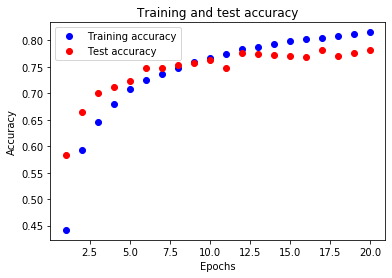

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Overfit Model

### Build the Model

In [40]:
# set up the layers

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Conv2D(32,(3, 3)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10))
model.add(keras.layers.Activation('softmax'))

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20

history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 268s 5ms/step - loss: 1.4258 - acc: 0.4863 - val_loss: 1.1174 - val_acc: 0.6084
Epoch 2/20
50000/50000 [==============================] - 266s 5ms/step - loss: 1.0706 - acc: 0.6203 - val_loss: 0.9541 - val_acc: 0.6693
Epoch 3/20
50000/50000 [==============================] - 262s 5ms/step - loss: 0.9023 - acc: 0.6825 - val_loss: 0.9431 - val_acc: 0.6633
Epoch 4/20
50000/50000 [==============================] - 261s 5ms/step - loss: 0.7663 - acc: 0.7299 - val_loss: 0.8974 - val_acc: 0.6892
Epoch 5/20
50000/50000 [==============================] - 261s 5ms/step - loss: 0.6427 - acc: 0.7742 - val_loss: 0.9226 - val_acc: 0.6898
Epoch 6/20
50000/50000 [==============================] - 261s 5ms/step - loss: 0.5359 - acc: 0.8119 - val_loss: 0.9330 - val_acc: 0.6922
Epoch 7/20
50000/50000 [==============================] - 262s 5ms/step - loss: 0.4462 - acc: 0.8415 - val_loss: 1.0076 - 

### Loss and Accuracy Graph

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

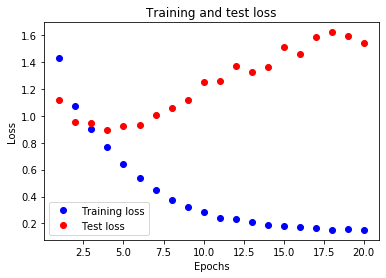

In [42]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

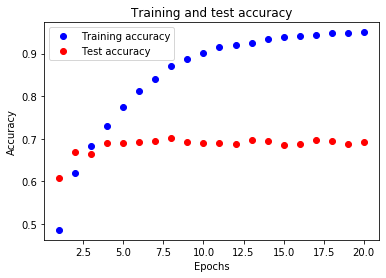

In [44]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Underfit Model

### Build the Model

In [53]:
# set up the layers

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(keras.layers.Activation('softmax'))
model.add(keras.layers.Conv2D(32,(3, 3)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dense(10))
model.add(keras.layers.Activation('softmax'))

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 10

history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 179s 4ms/step - loss: 1.8896 - acc: 0.3299 - val_loss: 1.6675 - val_acc: 0.4181
Epoch 2/10
50000/50000 [==============================] - 175s 3ms/step - loss: 1.6334 - acc: 0.4263 - val_loss: 1.5832 - val_acc: 0.4400
Epoch 3/10
50000/50000 [==============================] - 174s 3ms/step - loss: 1.5525 - acc: 0.4550 - val_loss: 1.5030 - val_acc: 0.4727
Epoch 4/10
50000/50000 [==============================] - 174s 3ms/step - loss: 1.4893 - acc: 0.4736 - val_loss: 1.4614 - val_acc: 0.4757
Epoch 5/10
50000/50000 [==============================] - 174s 3ms/step - loss: 1.4319 - acc: 0.4931 - val_loss: 1.4373 - val_acc: 0.4818
Epoch 6/10
50000/50000 [==============================] - 174s 3ms/step - loss: 1.3883 - acc: 0.5079 - val_loss: 1.3847 - val_acc: 0.5045
Epoch 7/10
50000/50000 [==============================] - 174s 3ms/step - loss: 1.3511 - acc: 0.5238 - val_loss: 1.3649 - 

### Loss and Accuracy Graph

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

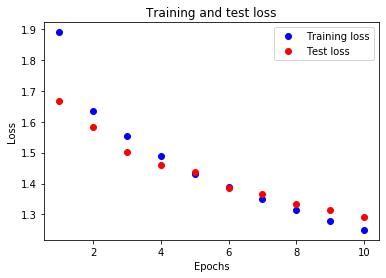

In [55]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

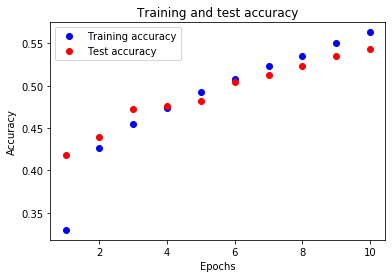

In [58]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()